In [3]:
#Frequency
import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Autoencoder
from torch import nn
import torch 
import torch.optim as optim

In [4]:
#Lectura
raw_data=mne.io.read_raw_fif("SR_10min_cleaned.fif",preload=True)
#raw_data.ch_names #raw_data.info.ch_names    ##raw_data.info["ch_names"]
raw_data.crop(4*60,12*60)
fmin=30
famx=110    #gamma band, freq in Hz
tmin = 0  # Start time in seconds
tmax = raw_data.times[-1]

epochs = mne.make_fixed_length_epochs(raw_data, duration=15.0, overlap=3)#preload=True
# You can now work with the epochs object
epochs.ch_names

Opening raw data file SR_10min_cleaned.fif...
Isotrak not found
    Range : 4608000 ... 5120000 =   9000.000 ... 10000.000 secs
Ready.
Reading 0 ... 512000  =      0.000 ...  1000.000 secs...


/tmp/ipykernel_1262/2639336200.py:2: RuntimeWarning: This filename (SR_10min_cleaned.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data=mne.io.read_raw_fif("SR_10min_cleaned.fif",preload=True)


Not setting metadata
39 matching events found
No baseline correction applied
0 projection items activated


["n'1",
 "n'2",
 "n'3",
 "n'4",
 "n'5",
 "n'6",
 "n'7",
 "n'8",
 "n'9",
 "n'10",
 "n'11",
 "cc'1",
 "cc'2",
 "cc'3",
 "cc'4",
 "cc'5",
 "cc'6",
 "cc'7",
 "cc'8",
 "cc'9",
 "cc'10",
 "cc'11",
 "cc'12",
 "cc'13",
 "cc'14",
 "cc'15",
 "m'1",
 "m'2",
 "m'3",
 "m'4",
 "m'5",
 "m'6",
 "m'7",
 "m'8",
 "m'9",
 "m'10",
 "sc'1",
 "sc'2",
 "sc'3",
 "sc'4",
 "sc'5",
 "sc'6",
 "sc'7",
 "sc'8",
 "sc'9",
 "sc'10",
 "sc'11",
 "sc'12",
 "sc'13",
 "sc'14",
 "sc'15",
 "lp'1",
 "lp'2",
 "lp'3",
 "lp'4",
 "lp'5",
 "lp'6",
 "lp'7",
 "lp'8",
 "lp'9",
 "lp'10",
 "lp'11",
 "lp'12",
 "y'1",
 "y'2",
 "y'3",
 "y'4",
 "y'5",
 "y'6",
 "y'7",
 "y'8",
 "y'9",
 "y'10",
 "y'11",
 "y'12",
 "oc'1",
 "oc'2",
 "oc'3",
 "oc'4",
 "oc'5",
 "oc'6",
 "oc'7",
 "oc'8",
 "oc'9",
 "oc'10",
 "op'1",
 "op'2",
 "op'3",
 "op'4",
 "op'5",
 "op'6",
 "op'7",
 "op'8",
 "op'9",
 "op'10",
 "op'11",
 "op'12",
 "pi'1",
 "pi'2",
 "pi'3",
 "pi'4",
 "pi'5",
 "pi'6",
 "pi'7",
 "pi'8",
 "pi'9",
 "pi'10",
 "pi'11",
 "pi'12",
 "pi'13",
 "pi'14",
 "pi

In [8]:
epochs.info["lowpass"]


134.0

In [25]:
epochs.get_data().shape

Using data from preloaded Raw for 39 events and 7680 original time points ...
0 bad epochs dropped


(39, 127, 7680)

In [5]:
# mne.pick_channels(raw_data.info["ch_names"],include=["n'3"])

array([2])

In [4]:
# a=raw_data.to_data_frame()

In [5]:
# Create fixed-length epochs


Not setting metadata
16 matching events found
No baseline correction applied
0 projection items activated
<Epochs | 16 events (good & bad), 0 – 29.998 s (baseline off), ~130 kB, data not loaded,
 '1': 16>


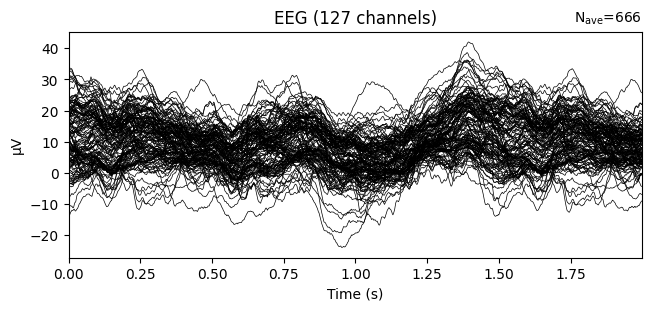

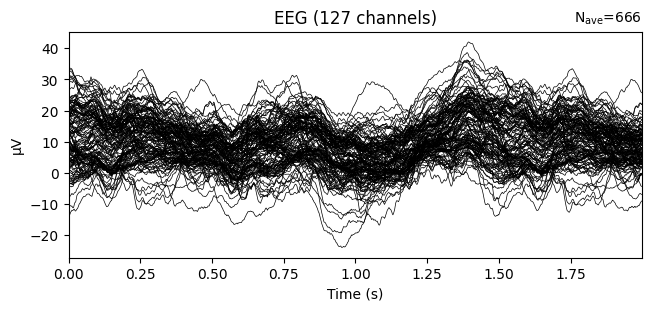

In [14]:
epochs.average().plot()

In [6]:
picks=["n'1", "n'2", "n'3", "n'4", "cc'1", "cc'2", "cc'3", "cc'4"]#, "cc'5", "m'1", "m'2"
#  "m'3", "m'4", "m'5", "sc'2", "sc'3", "sc'4", "sc'5", "sc'6", "lp'1", "lp'2", "lp'3", "lp'4",
#  "lp'5", "y'1", "y'2", "y'3", "y'4", "y'5", "y'6", "oc'1", "oc'2", "oc'3", "oc'4", "op'1", "op'2",
#  "op'3", "op'4", "pi'1", "pi'2", "pi'3", "pa'1", "pa'2", "pa'3", "pa'4"]

In [1]:
file_length_seconds = raw_data.n_times / raw_data.info['sfreq']
file_length_seconds


NameError: name 'raw_data' is not defined

In [ ]:
# Plot the Power Spectral Density (PSD)
# raw_data.plot_psd(fmax=100)  # Adjust fmax to the maximum frequency of interest

# notch_freqs = np.arange(60, raw.info['sfreq'] / 2, 60)
# raw.notch_filter(freqs=notch_freqs)
# raw.filter(l_freq=1, h_freq=100)

# raw.plot_psd()if picks==None:
#         picks=raw_data.ch_names
#         print(picks)


# # Save the epochs to disk
# output_epochs_file = 'Data/full_recording_epochs-epo.fif'
# epochs.save(output_epochs_file, overwrite=True)

# # Check the number of epochs created
# num_epochs = len(epochs)
# print(f"Number of epochs created: {num_epochs}")

In [45]:
frequencies=np.linspace(30,100,50)
power = epochs.compute_tfr(
    method="morlet",
    picks=picks,
    freqs=frequencies,
    n_cycles=frequencies/2, #n_ciclos por cada freq
    #time_bandwidth=time_bandwidth,
    return_itc=False,
    #average=True,
    n_jobs=3    
)
#plot.set_title("TFR")
# Plot results. Baseline correct based on first 100 ms.

# power.plot(
#     [0],
#     baseline=(0.0, 0.1),
#     mode="mean",
#     #vlim=(vmin, vmax),
#     #axes=ax,
#     show=False,
#     colorbar=False,
# )

Using data from preloaded Raw for 16 events and 15360 original time points ...


/tmp/ipykernel_193229/2641959193.py:2: RuntimeWarning: joblib not installed. Cannot run in parallel.
  power = epochs.compute_tfr(


Epochs extent:  0.0 29.998046875 30.0 100.0


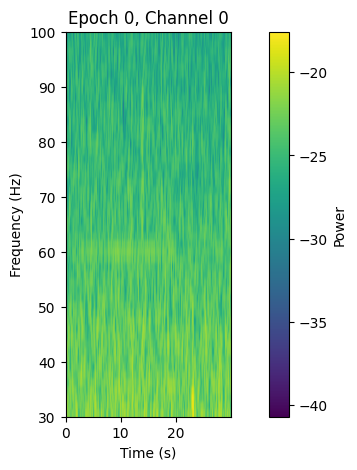

Epochs extent:  0.0 29.998046875 30.0 100.0


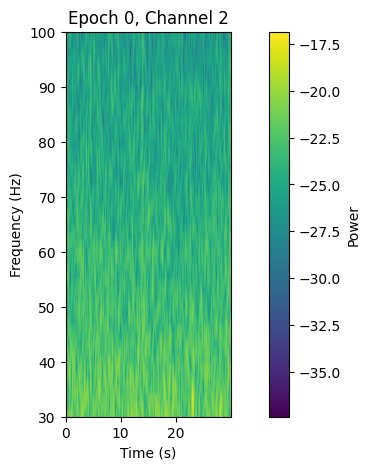

Epochs extent:  0.0 29.998046875 30.0 100.0


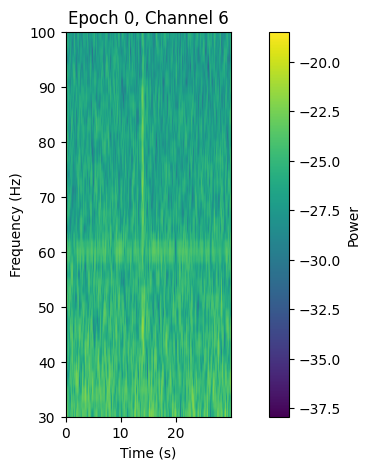

Epochs extent:  0.0 29.998046875 30.0 100.0


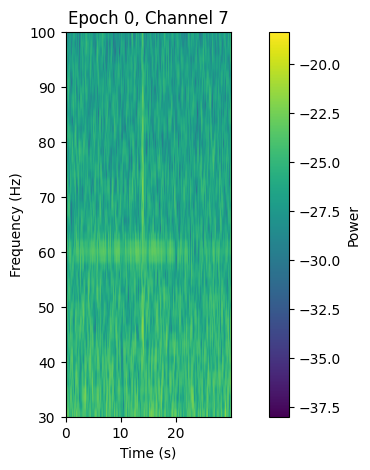

Epochs extent:  0.0 29.998046875 30.0 100.0


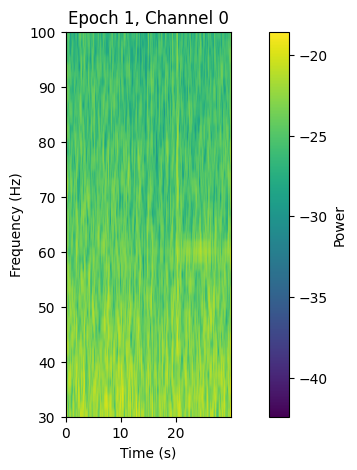

Epochs extent:  0.0 29.998046875 30.0 100.0


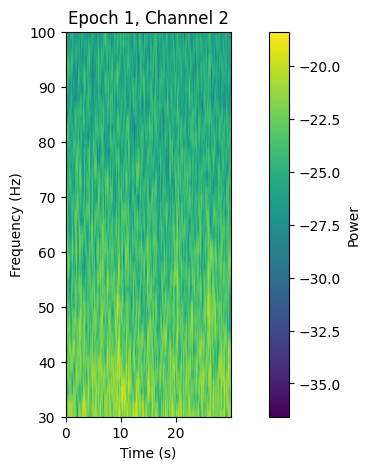

Epochs extent:  0.0 29.998046875 30.0 100.0


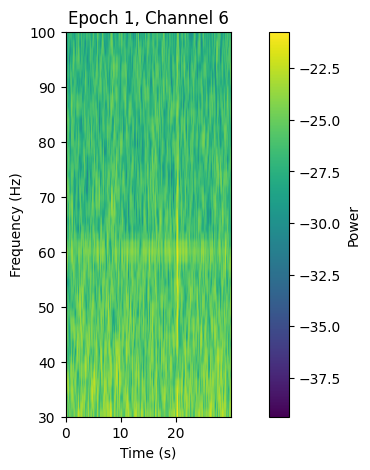

Epochs extent:  0.0 29.998046875 30.0 100.0


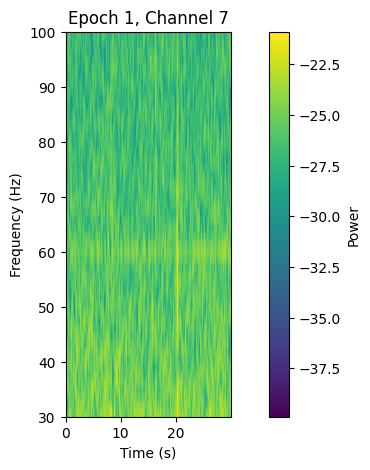

Epochs extent:  0.0 29.998046875 30.0 100.0


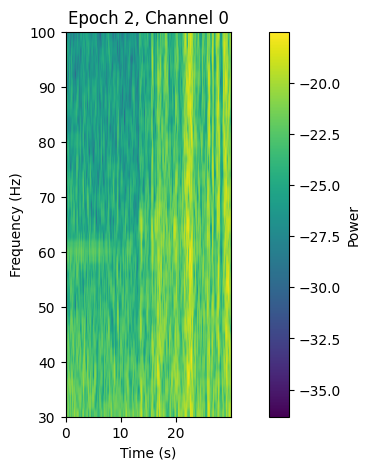

Epochs extent:  0.0 29.998046875 30.0 100.0


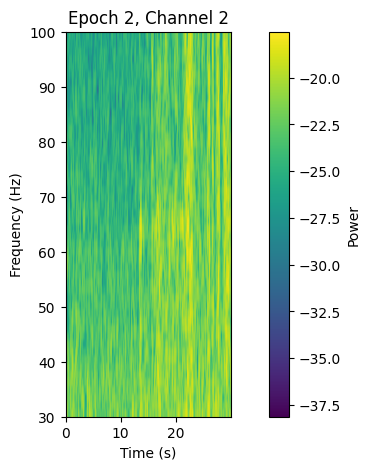

Epochs extent:  0.0 29.998046875 30.0 100.0


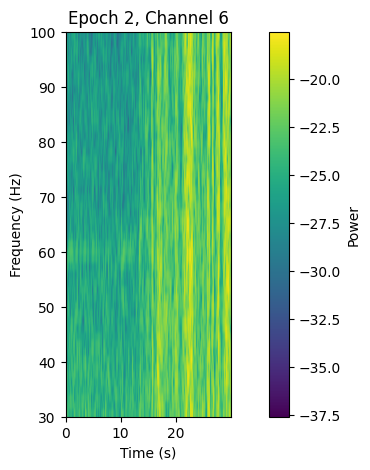

Epochs extent:  0.0 29.998046875 30.0 100.0


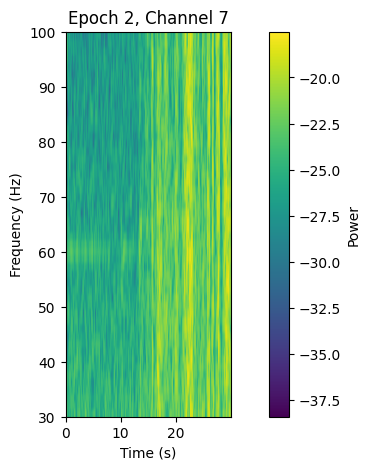

Epochs extent:  0.0 29.998046875 30.0 100.0


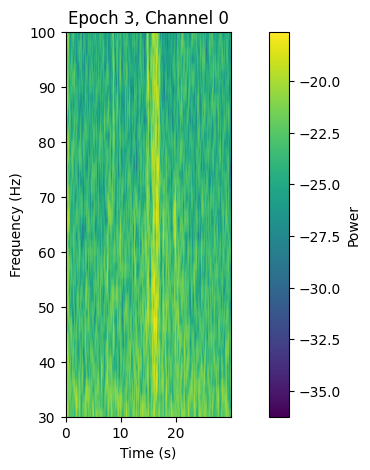

Epochs extent:  0.0 29.998046875 30.0 100.0


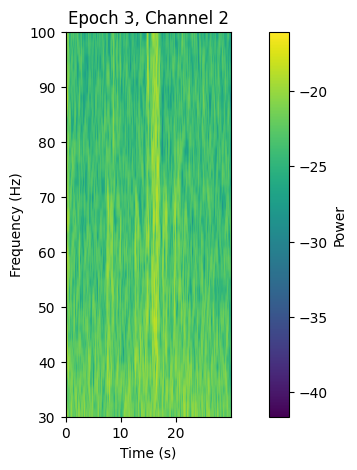

Epochs extent:  0.0 29.998046875 30.0 100.0


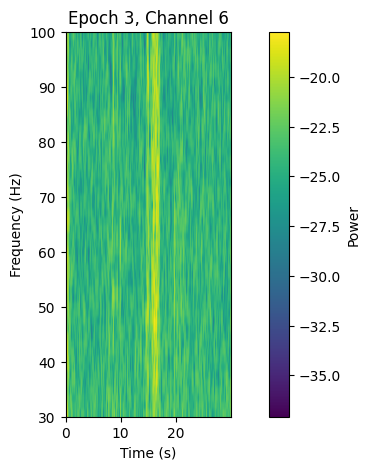

Epochs extent:  0.0 29.998046875 30.0 100.0


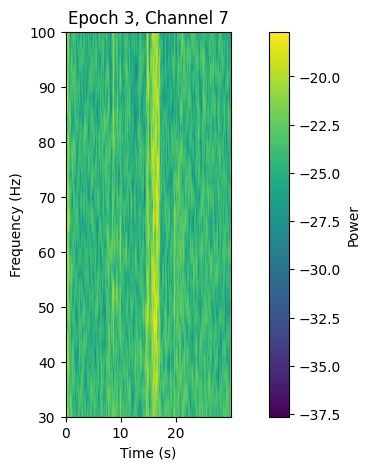

Epochs extent:  0.0 29.998046875 30.0 100.0


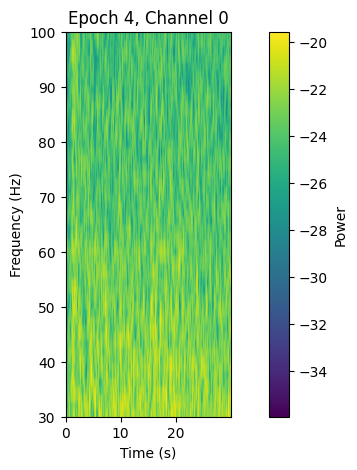

Epochs extent:  0.0 29.998046875 30.0 100.0


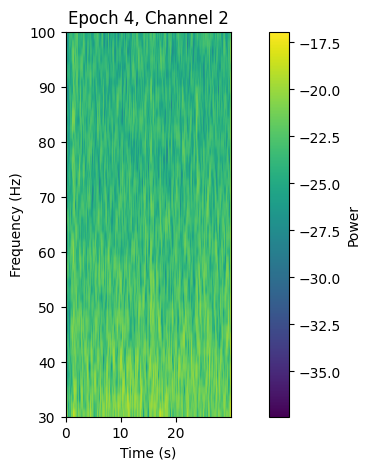

Epochs extent:  0.0 29.998046875 30.0 100.0


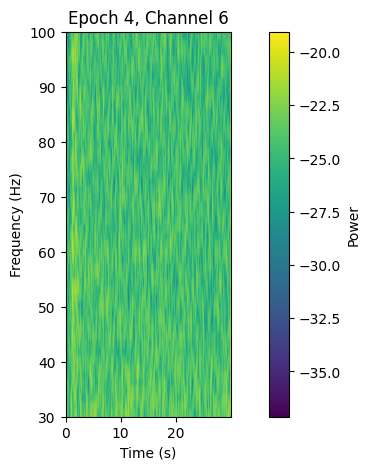

Epochs extent:  0.0 29.998046875 30.0 100.0


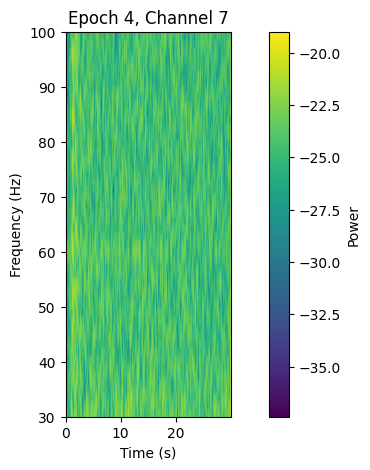

Epochs extent:  0.0 29.998046875 30.0 100.0


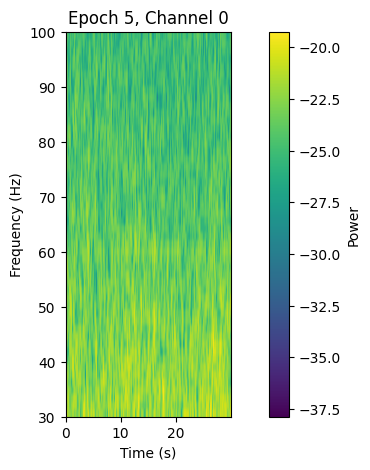

Epochs extent:  0.0 29.998046875 30.0 100.0


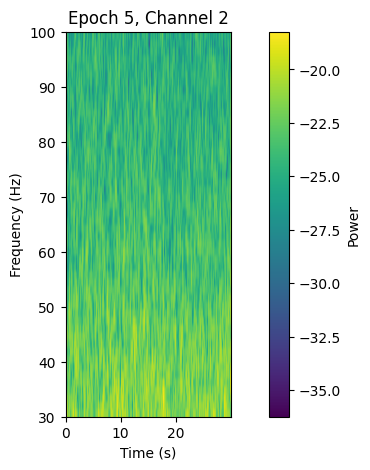

Epochs extent:  0.0 29.998046875 30.0 100.0


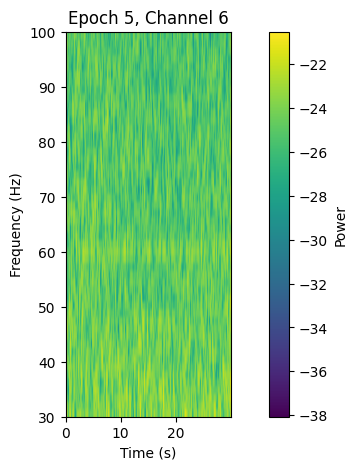

Epochs extent:  0.0 29.998046875 30.0 100.0


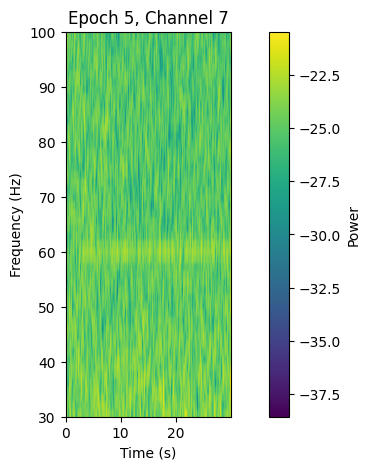

Epochs extent:  0.0 29.998046875 30.0 100.0


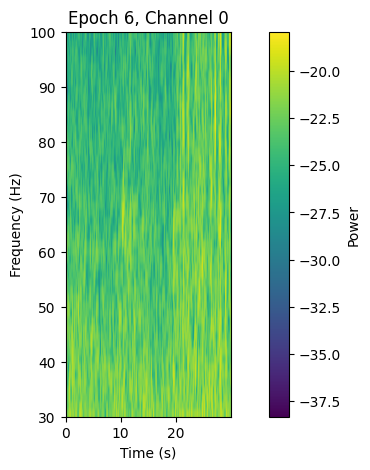

Epochs extent:  0.0 29.998046875 30.0 100.0


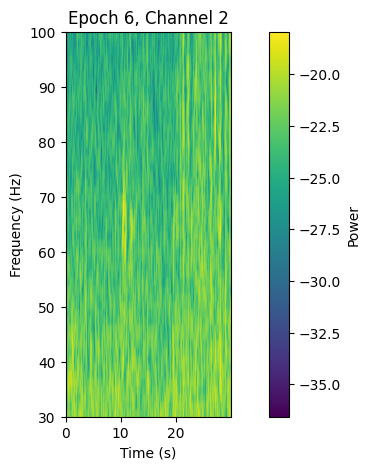

Epochs extent:  0.0 29.998046875 30.0 100.0


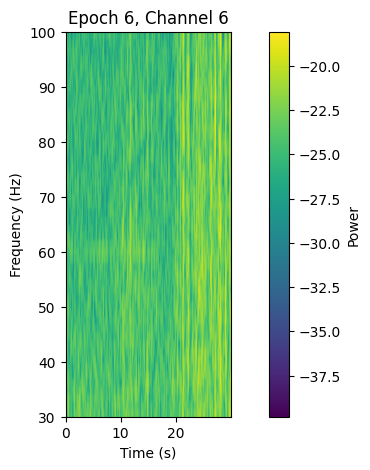

Epochs extent:  0.0 29.998046875 30.0 100.0


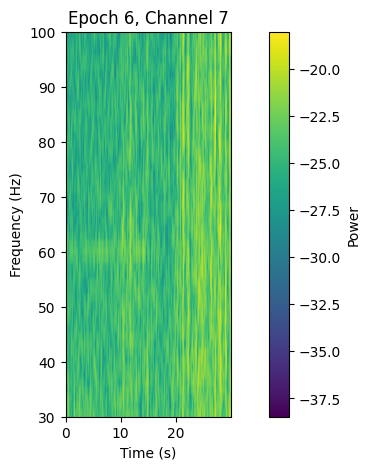

Epochs extent:  0.0 29.998046875 30.0 100.0


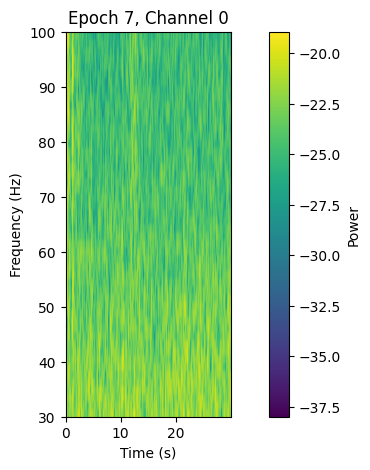

Epochs extent:  0.0 29.998046875 30.0 100.0


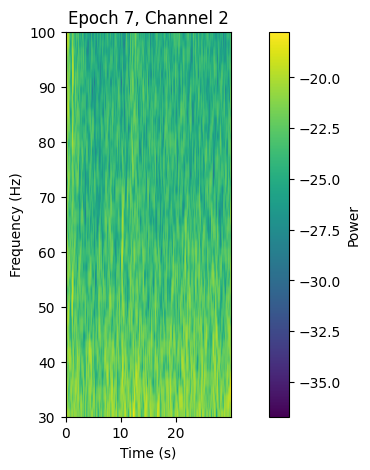

Epochs extent:  0.0 29.998046875 30.0 100.0


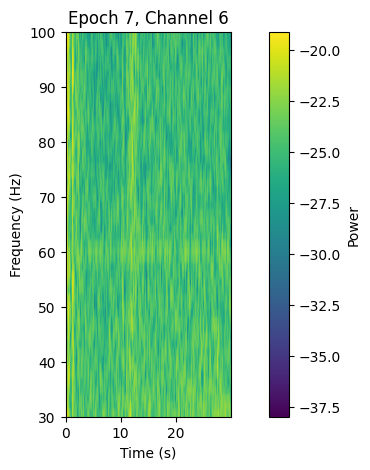

Epochs extent:  0.0 29.998046875 30.0 100.0


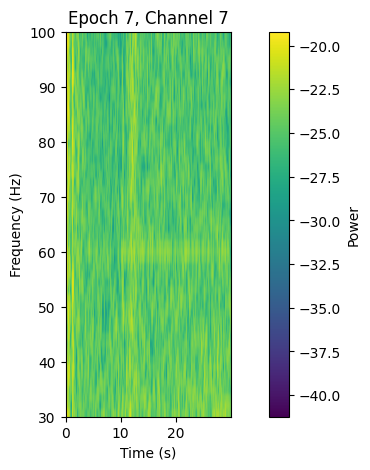

Epochs extent:  0.0 29.998046875 30.0 100.0


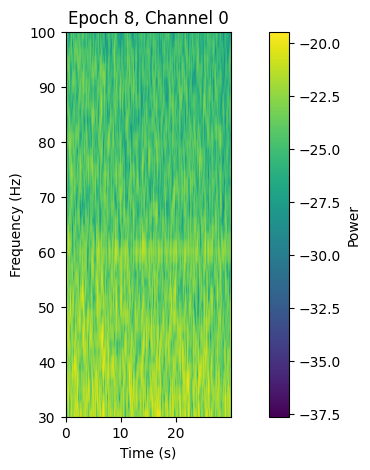

Epochs extent:  0.0 29.998046875 30.0 100.0


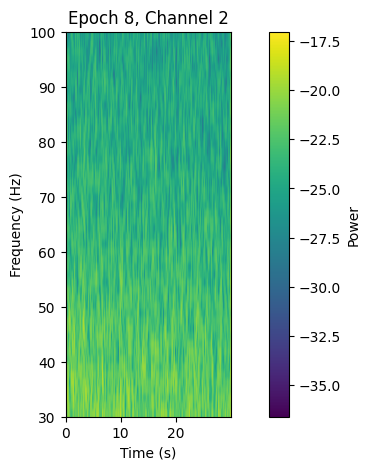

Epochs extent:  0.0 29.998046875 30.0 100.0


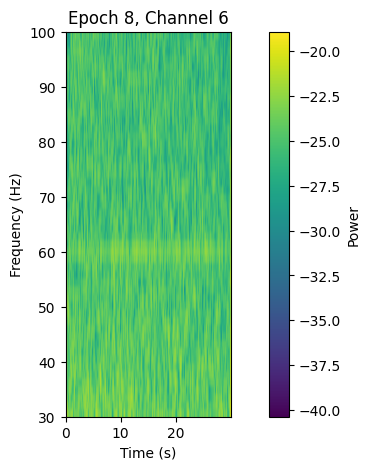

Epochs extent:  0.0 29.998046875 30.0 100.0


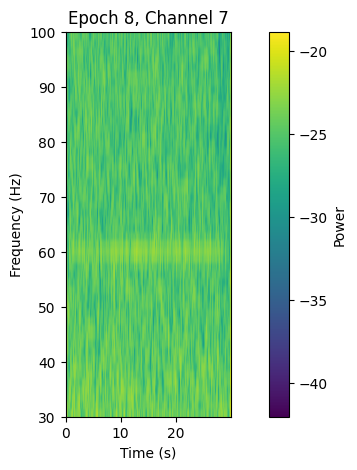

Epochs extent:  0.0 29.998046875 30.0 100.0


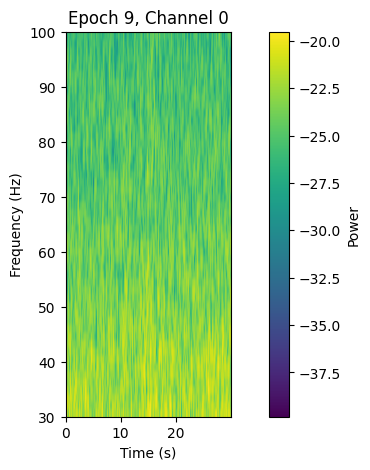

Epochs extent:  0.0 29.998046875 30.0 100.0


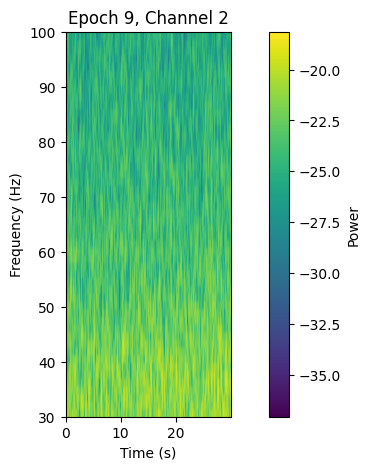

Epochs extent:  0.0 29.998046875 30.0 100.0


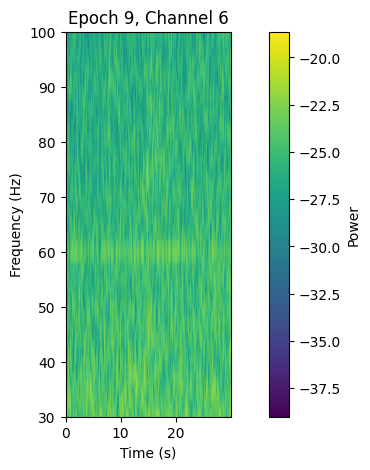

Epochs extent:  0.0 29.998046875 30.0 100.0


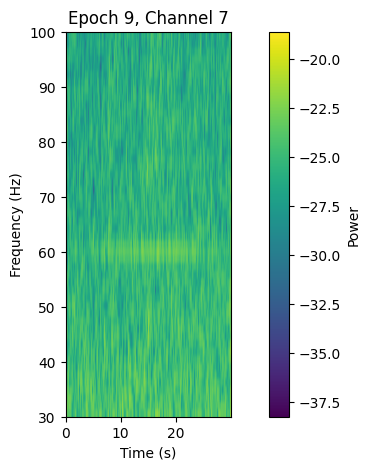

Epochs extent:  0.0 29.998046875 30.0 100.0


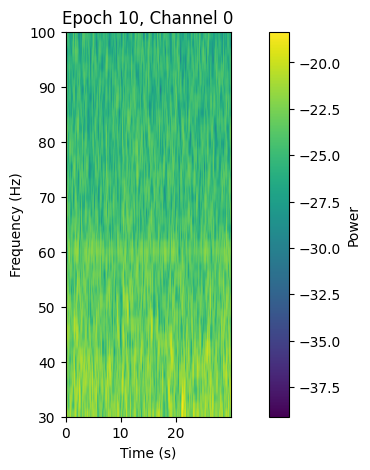

Epochs extent:  0.0 29.998046875 30.0 100.0


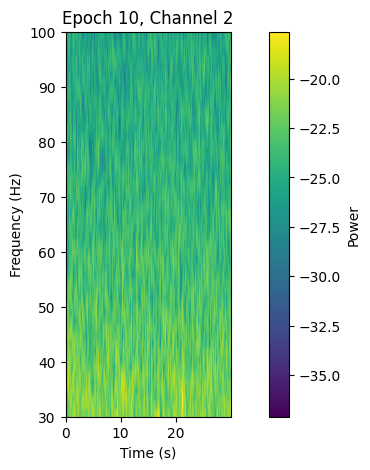

Epochs extent:  0.0 29.998046875 30.0 100.0


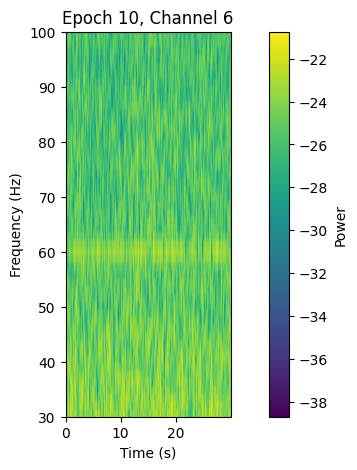

Epochs extent:  0.0 29.998046875 30.0 100.0


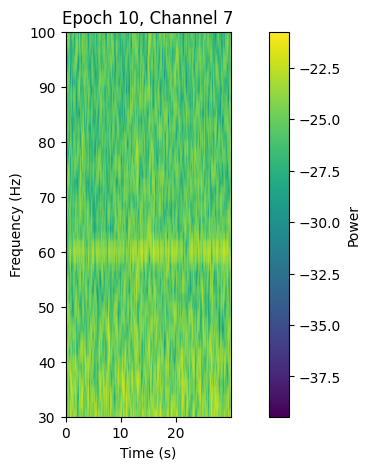

Epochs extent:  0.0 29.998046875 30.0 100.0


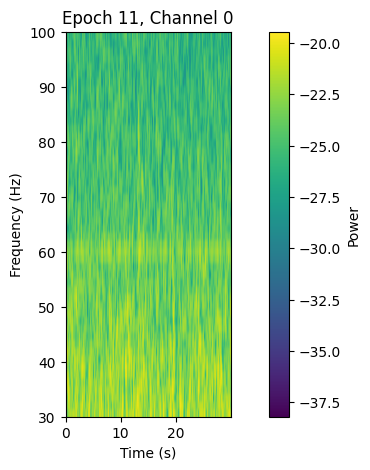

Epochs extent:  0.0 29.998046875 30.0 100.0


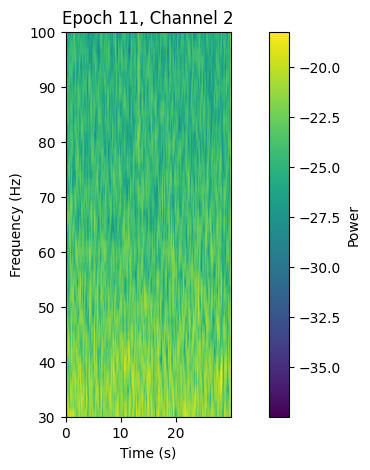

Epochs extent:  0.0 29.998046875 30.0 100.0


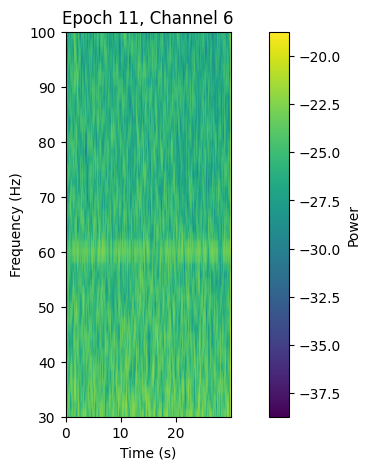

Epochs extent:  0.0 29.998046875 30.0 100.0


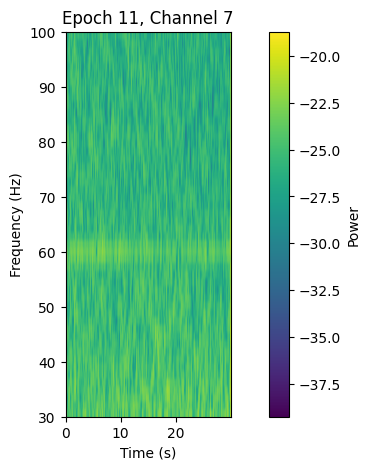

: 

In [46]:
n_epochs,n_channels,n_freqs,n_times=power.data.shape

epoch_idx=8
# ch_idx=6
for epoch_idx in range(12):
    for ch_idx in [0,2,6,7]:
        spectrogram = np.log(power.data[epoch_idx, ch_idx, :, :])

        #epochs.compute_psd().plot(amplitude=False)
        print("Epochs extent: ",epochs.times[0], epochs.times[-1], frequencies[0], frequencies[-1])
        # Plot spectrogram
        plt.figure(figsize=(10, 5))
        plt.imshow(spectrogram, origin='lower',extent=[epochs.times[0], epochs.times[-1], frequencies[0], frequencies[-1]])
        plt.colorbar(label='Power')
        plt.title(f'Epoch {epoch_idx}, Channel {ch_idx }')
        plt.xlabel('Time (s)')
        plt.ylabel('Frequency (Hz)')
        plt.show()


In [31]:
spectrogram[35:37,5000:5005]

array([[2.09828856e-11, 2.18079167e-11, 2.26508805e-11, 2.35114821e-11,
        2.43889918e-11],
       [1.15658411e-11, 1.23143967e-11, 1.30888616e-11, 1.38879656e-11,
        1.47105279e-11]])